#***`STROKE PREDICTION WITH CEREBERAL DATASET`***

The project involves developing a stroke prediction model using machine learning techniques, specifically leveraging XGBoost. The model is integrated into a Streamlit web interface for user interaction and visualization, aiming to provide accurate predictions based on demographic, health, and lifestyle factors. The project's focus includes optimizing model performance and ensuring user-friendly access to predictive insights.


**`First we import a set of python libraries to run and support our code. The following libraries are used for the stroke prediction`**




- **pandas (pd):** Data manipulation library for working with structured data.

- **numpy (np):** Numerical computing library for arrays and matrices.

- **matplotlib.pyplot (plt):** Plotting library for creating visualizations.

- **seaborn (sns):** Statistical data visualization based on Matplotlib, offering enhanced aesthetics.

- **sklearn.model_selection.train_test_split:** Function for splitting datasets into training and testing sets.

- **sklearn.preprocessing.StandardScaler:** Standardization technique for scaling features.

- **sklearn.preprocessing.LabelEncoder:** Encoding categorical labels as numerical values for machine learning models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**Loads a CSV file named "Cereberal_Dataset.csv" into a pandas DataFrame named df**

In [ ]:
df=pd.read_csv("Cereberal_Dataset.csv")

**`We now perform exploratory data analysis (EDA) steps that provide an overview and summary statistics of a DataFrame in pandas:`**


1. `df.info()`: Provides a concise summary of the DataFrame, including data types, non-null counts, and memory usage.

2. `df.describe(include='all')`: Generates summary statistics for all columns, detailing distribution and central tendencies for numerical and categorical data.




In [ ]:
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB
None


In [ ]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                  id  gender           age  hypertension  heart_disease  \
count   43400.000000   43400  43400.000000  43400.000000   43400.000000   
unique           NaN       3           NaN           NaN            NaN   
top              NaN  Female           NaN           NaN            NaN   
freq             NaN   25665           NaN           NaN            NaN   
mean    36326.142350     NaN     42.217894      0.093571       0.047512   
std     21072.134879     NaN     22.519649      0.291235       0.212733   
min         1.000000     NaN      0.080000      0.000000       0.000000   
25%     18038.500000     NaN     24.000000      0.000000       0.000000   
50%     36351.500000     NaN     44.000000      0.000000       0.000000   
75%     54514.250000     NaN     60.000000      0.000000       0.000000   
max     72943.000000     NaN     82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level           bmi 

**Missing Values and the features containing them are counted in this step.**
 * Based on the nature of the missing values, we implement various strategies to address them

In [ ]:
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(df.isnull().sum())
print()
missing_value = missing_values[missing_values > 0]

print("Columns with Missing Values:")
print(missing_value)


Missing Values:
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

Columns with Missing Values:
bmi                1462
smoking_status    13292
dtype: int64


In [ ]:
print(df.head(10))

      id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   
5  32257  Female  47.0             0              0          Yes   
6  52800  Female  52.0             0              0          Yes   
7  41413  Female  75.0             0              1          Yes   
8  15266  Female  32.0             0              0          Yes   
9  28674  Female  74.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0       children          Rural              95.12  18.0              NaN   
1        Private          Urban              87.96  39.2     never smoked   
2        Private    

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


**Here we perform data conversion, where the non numeric variables, ie String variables are converted to Categorical variables.**

In [ ]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    df[col] = df[col].astype('category')
print("After Data Type Conversion:")
print(df.dtypes)
df

After Data Type Conversion:
id                      int64
gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


**Filling missing value with modes (categorical).**

In [ ]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


**Treating missing values with mean (numeric).**


In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


**Missing values are removed.**

In [ ]:
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


 **`FEATURE ENGINEERING`**


 **We perform label encoding to covert categorical variables to numeric variables.**


**Gender:**
* Male -> 1
* Female -> 0

**Ever Married:**
* Yes -> 1
* No -> 0

**Work Type:**
* children -> 0
* Private -> 2
* Never_worked -> 3
* Self-employed -> 4
* Govt_job -> 1

**Residence Type:**
* Rural -> 0
* Urban -> 1

**Smoking Status:**
* never smoked -> 1
* formerly smoked -> 0
* smokes -> 2


In [ ]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,4,1,58.64,20.4,1,0
43396,5450,0,56.0,0,0,1,0,1,213.61,55.4,0,0
43397,28375,0,82.0,1,0,1,2,1,91.94,28.9,0,0
43398,27973,1,40.0,0,0,1,2,1,99.16,33.2,1,0


**We now perform steps to detect and treat outliers in specific numerical columns of a DataFrame using z-scores:**

1. `from scipy.stats import zscore`: Imports the `zscore` function for standardizing numerical columns.

2. `numerical_columns = ['age', 'avg_glucose_level', 'bmi']`: Specifies the list of numerical columns to analyze for outliers.

3. `z_scores = np.abs(zscore(df[numerical_columns]))`: Calculates the absolute z-scores for the specified numerical columns.

4. `outlier_counts = (z_scores > 3).sum(axis=0)`: Counts the number of outliers (z-scores greater than 3) in each specified numerical column.

5. `df[numerical_columns] = np.where(z_scores > 3, 3, df[numerical_columns])`: Caps the outliers in the specified numerical columns to a z-score value of 3.


In [ ]:
from scipy.stats import zscore
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
z_scores = np.abs(zscore(df[numerical_columns]))
outlier_counts = (z_scores > 3).sum(axis=0)
print("Outlier Counts:")
print(outlier_counts)
print("\n")
df[numerical_columns] = np.where(z_scores > 3, 3, df[numerical_columns])
print("DataFrame after Outlier Treatment:")
print(df.head())

Outlier Counts:
age                    0
avg_glucose_level    645
bmi                  437
dtype: int64


DataFrame after Outlier Treatment:
      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0  30669       1   3.0             0              0             0          4   
1  30468       1  58.0             1              0             1          2   
2  16523       0   8.0             0              0             0          2   
3  56543       0  70.0             0              0             1          2   
4  46136       1  14.0             0              0             0          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               0              95.12  18.0               1       0  
1               1              87.96  39.2               1       0  
2               1             110.89  17.6               1       0  
3               0              69.04  35.9               0       0  
4               0             161

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,1,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,1,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,4,1,58.64,20.4,1,0
43396,5450,0,56.0,0,0,1,0,1,213.61,3.0,0,0
43397,28375,0,82.0,1,0,1,2,1,91.94,28.9,0,0
43398,27973,1,40.0,0,0,1,2,1,99.16,33.2,1,0


In [ ]:
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


**`Random Forest Classifier Feature Importance Analysis`**



- **Data Preparation**:
  - `X = df.drop(columns=['id', 'stroke'])`: Creates a new DataFrame `X` by excluding columns 'id' and 'stroke'.
  - `y = df['stroke']`: Extracts the target variable 'stroke' into Series `y`.

- **Model Training**:
  - Initializes a RandomForestClassifier with a fixed random state for consistency.
  - Trains the classifier on the training data to learn the relationships between features and the target variable.

- **Feature Importance Analysis**:
  - Computes feature importances based on the trained Random Forest model to understand which features are most influential in predicting the target variable.
  - Here glucose level, bmi and age are considered as the top 3 features, so we give more priority to these features

- **Visualization**:
  - Displays a bar plot showing the sorted feature importances to visually compare the importance of different features in the dataset.





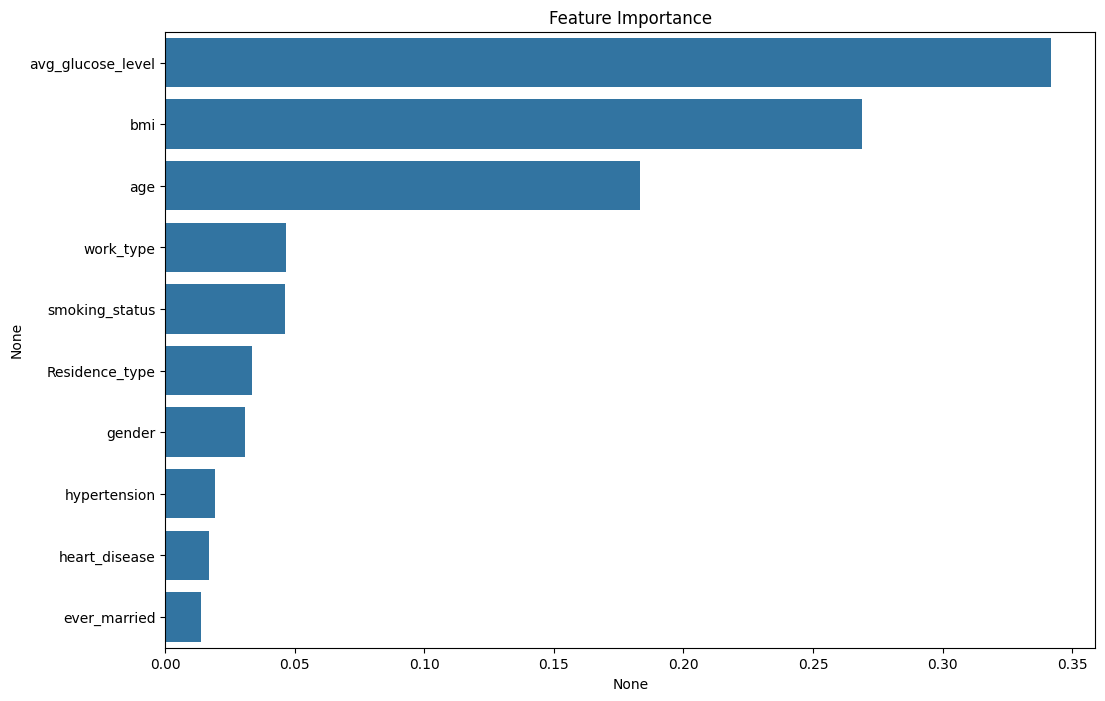

In [ ]:
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
sorted_importances = importances.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importance')
plt.show()

>We plot categorical variables **('gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status')** against **stroke** occurrence using bar plots.

* Each subplot visualizes how these variables relate to the likelihood of stroke using seaborn.


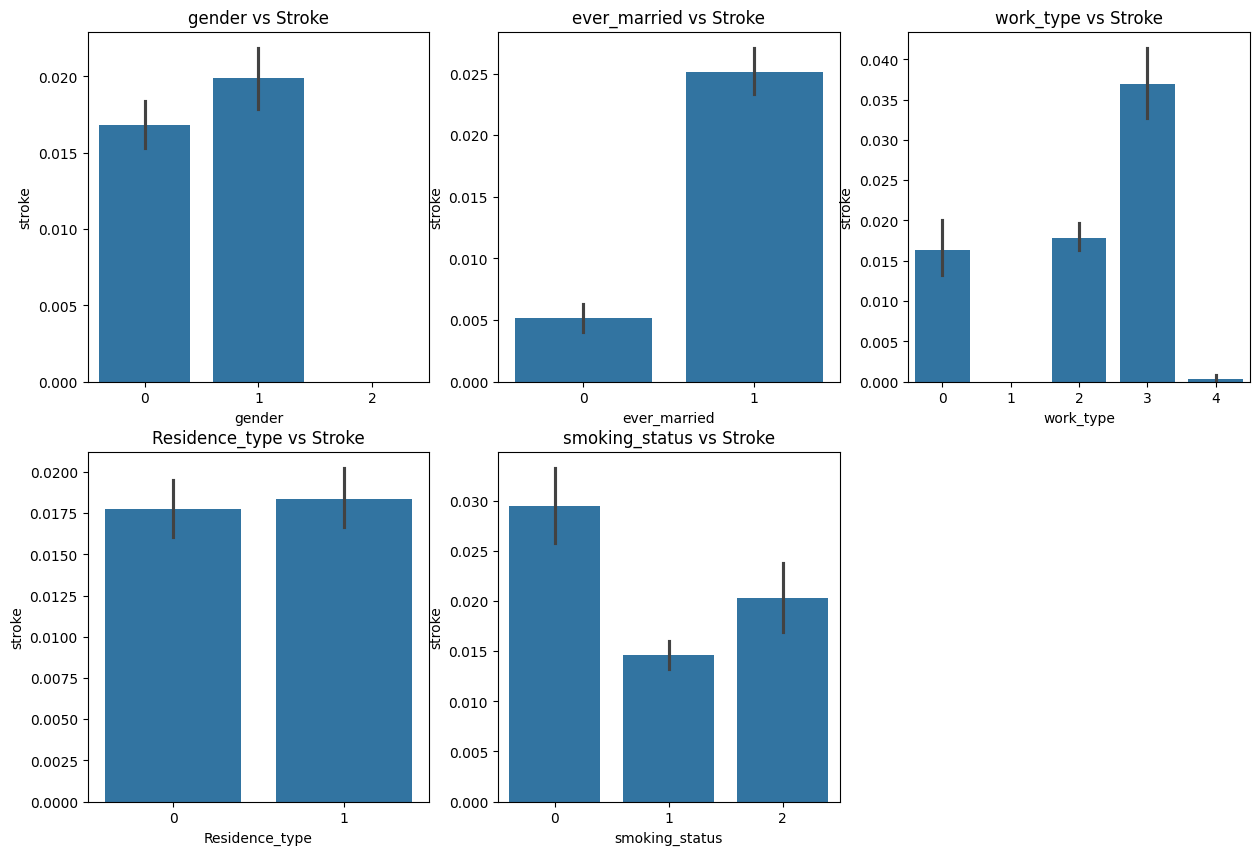

In [ ]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=df[col], y=df['stroke'])
    plt.title(f'{col} vs Stroke')
plt.show()

In [ ]:
for col in categorical_columns:
    print(df[col].value_counts())


gender
0    25665
1    17724
2       11
Name: count, dtype: int64
ever_married
1    27938
0    15462
Name: count, dtype: int64
work_type
2    24834
3     6793
4     6156
0     5440
1      177
Name: count, dtype: int64
Residence_type
1    21756
0    21644
Name: count, dtype: int64
smoking_status
1    29345
0     7493
2     6562
Name: count, dtype: int64


In [ ]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34720, 10)
X_test shape: (8680, 10)
y_train shape: (34720,)
y_test shape: (8680,)


>The code performs data preprocessing for numerical columns **('age', 'avg_glucose_level', 'bmi')** by scaling them using **StandardScaler**.

 It splits the dataset into training and test sets, applies scaling to each numerical column independently for both training and test sets.


In [ ]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()


In [ ]:
for i in numerical_columns:
    X_train[i] = scaler.fit_transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])

In [ ]:
print(X_train.head())
print(X_test.head())

       gender       age  hypertension  heart_disease  ever_married  work_type  \
12858       0  1.368223             0              0             1          2   
10591       0 -0.715846             0              0             1          2   
26775       0 -1.026239             0              0             0          2   
6662        0 -0.361111             0              0             1          2   
19985       1 -0.006376             0              0             1          2   

       Residence_type  avg_glucose_level       bmi  smoking_status  
12858               0           1.049650  0.072550               1  
10591               0           0.073894 -0.633912               0  
26775               1          -0.417017 -0.700560               1  
6662                1          -0.891428 -0.393982               1  
19985               1          -0.457057  1.965334               2  
       gender       age  hypertension  heart_disease  ever_married  work_type  \
29554       0  0.5

**Sampling**




***Addressing Class Imbalance and Feature Importance Analysis***

1. **Class Imbalance Handling**:
   - Computes and displays the distribution of the 'stroke' classes in the training data, where 'stroke' represents the minority class and 'no stroke' the majority.
   - Applies SMOTE (Synthetic Minority Over-sampling Technique) for oversampling if the minority class ('stroke') is significantly underrepresented compared to the majority class ('no stroke').
   - Prints the updated class distribution after SMOTE oversampling if applied.

2. **Model Training**:
   - Initializes a RandomForestClassifier with a fixed random state for consistency.
   - Fits the classifier using the resampled data (either original or SMOTE-resampled).


>**Initial Class Distribution:**
- Class '0' (no stroke): 34098 instances
- Class '1' (stroke): 622 instances

>**After SMOTE Oversampling:**
- Class '0' (no stroke): 34098 instances
- Class '1' (stroke): 34098 instances





In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
stroke_counts = y_train.value_counts()
print("Stroke Class Distribution:")
print(stroke_counts)

if stroke_counts.min() / stroke_counts.max() < 0.5:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print("After SMOTE Oversampling:")
    print(y_resampled.value_counts())
else:
    X_resampled, y_resampled = X_train, y_train

rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
sorted_importances = importances.sort_values(ascending=False)

Stroke Class Distribution:
stroke
0    34098
1      622
Name: count, dtype: int64
After SMOTE Oversampling:
stroke
0    34098
1    34098
Name: count, dtype: int64


- **Feature Importance Analysis**:
  - Computes feature importances based on the trained Random Forest model to understand which features are most influential in predicting the target variable.
  - Here age, glucose level, bmi are considered as the top 3 features, so we give more priority to these features

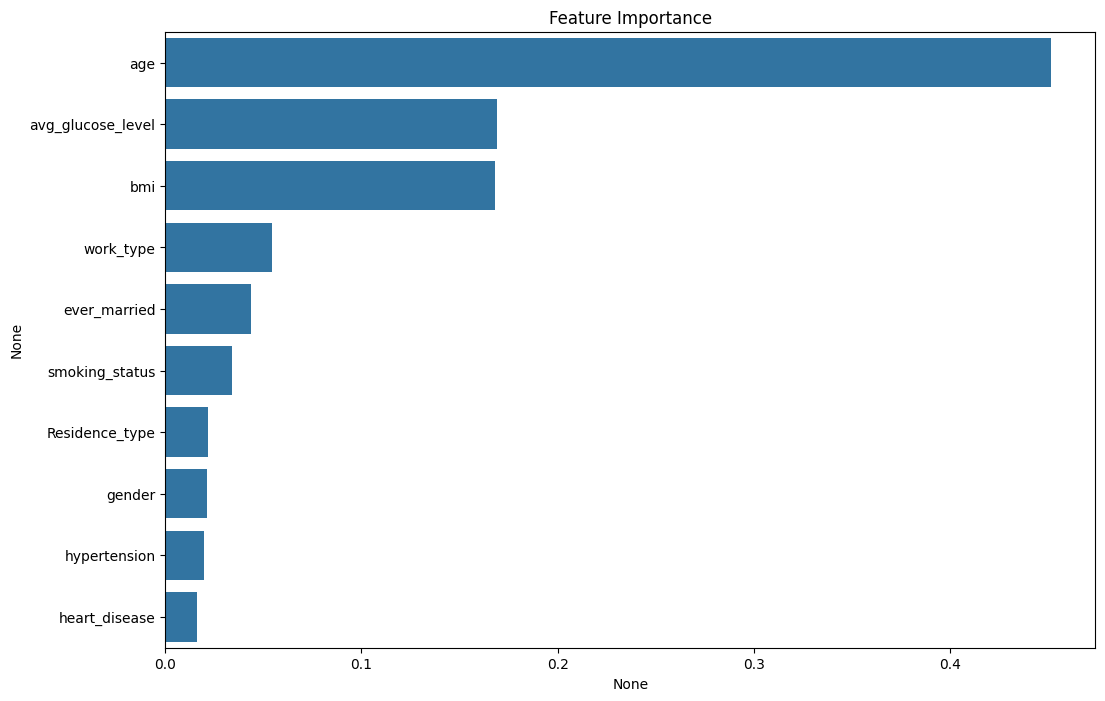

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index)
plt.title('Feature Importance')
plt.show()

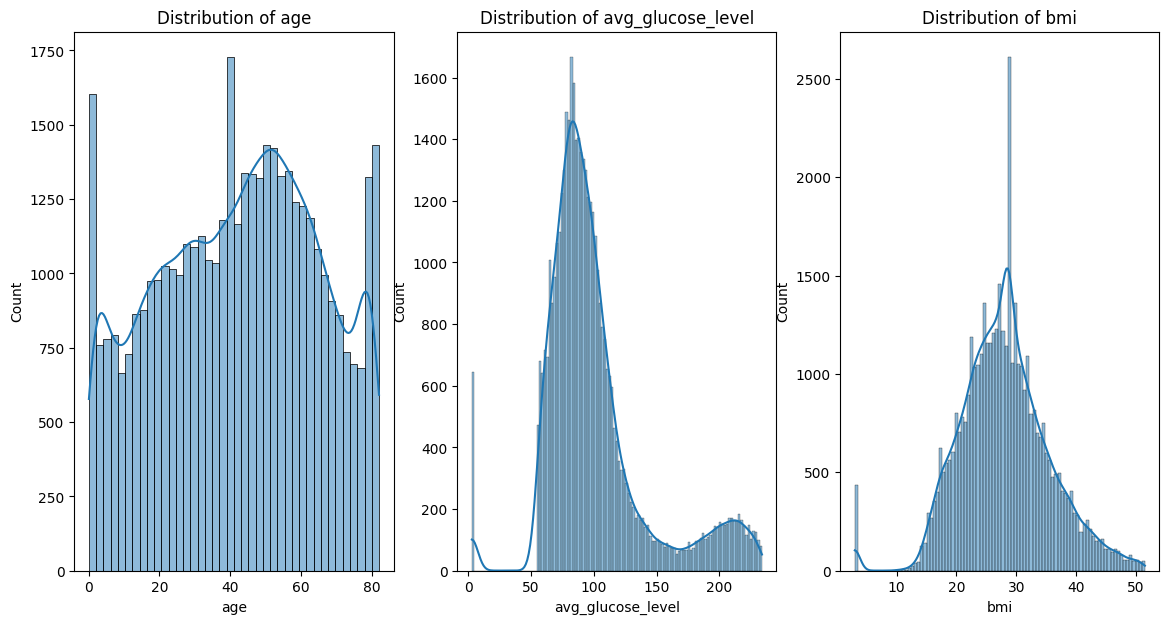

In [ ]:
plt.figure(figsize=(14, 7))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.show()

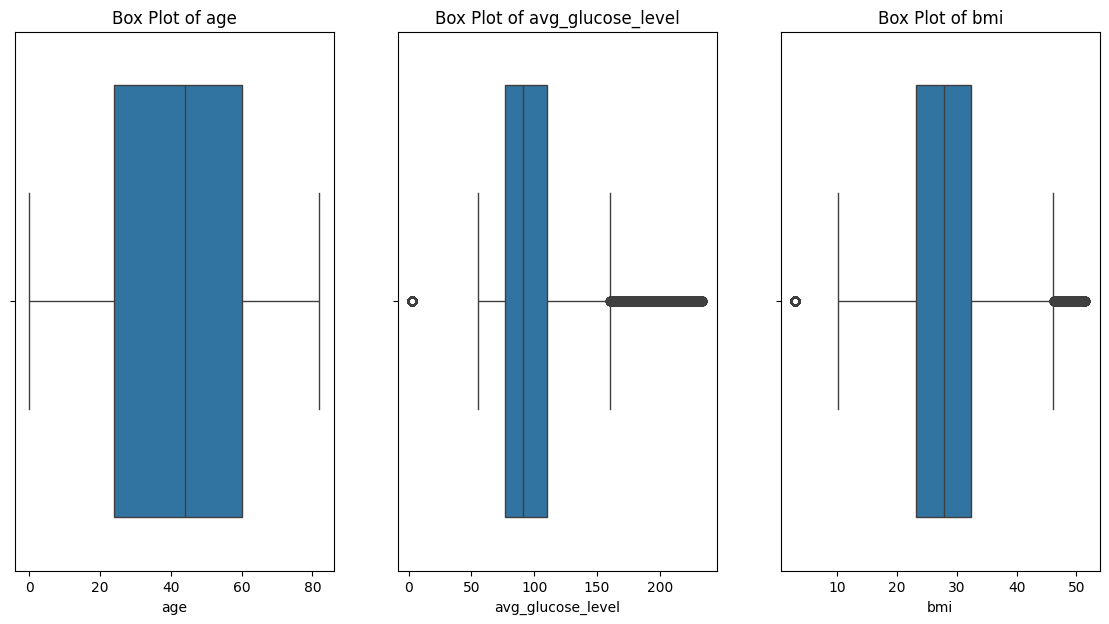

In [ ]:
plt.figure(figsize=(14, 7))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.show()

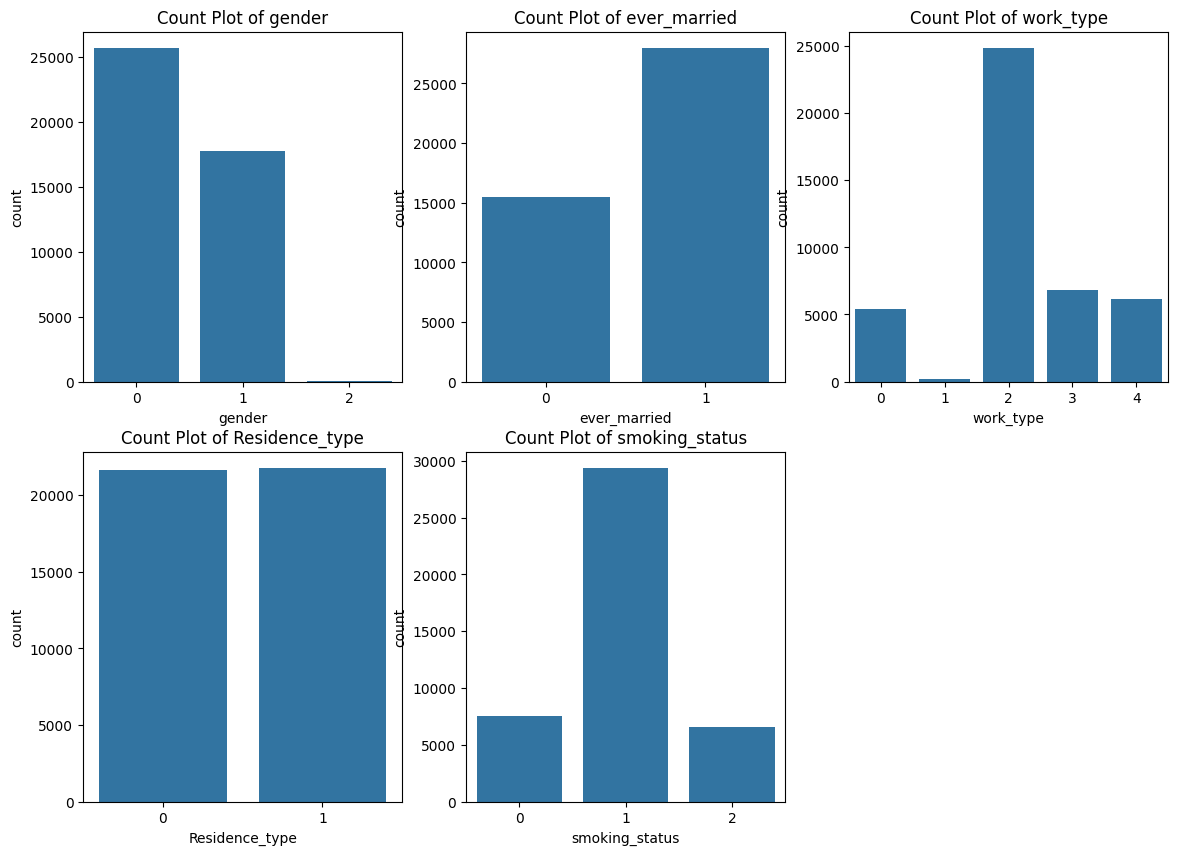

In [ ]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
plt.show()

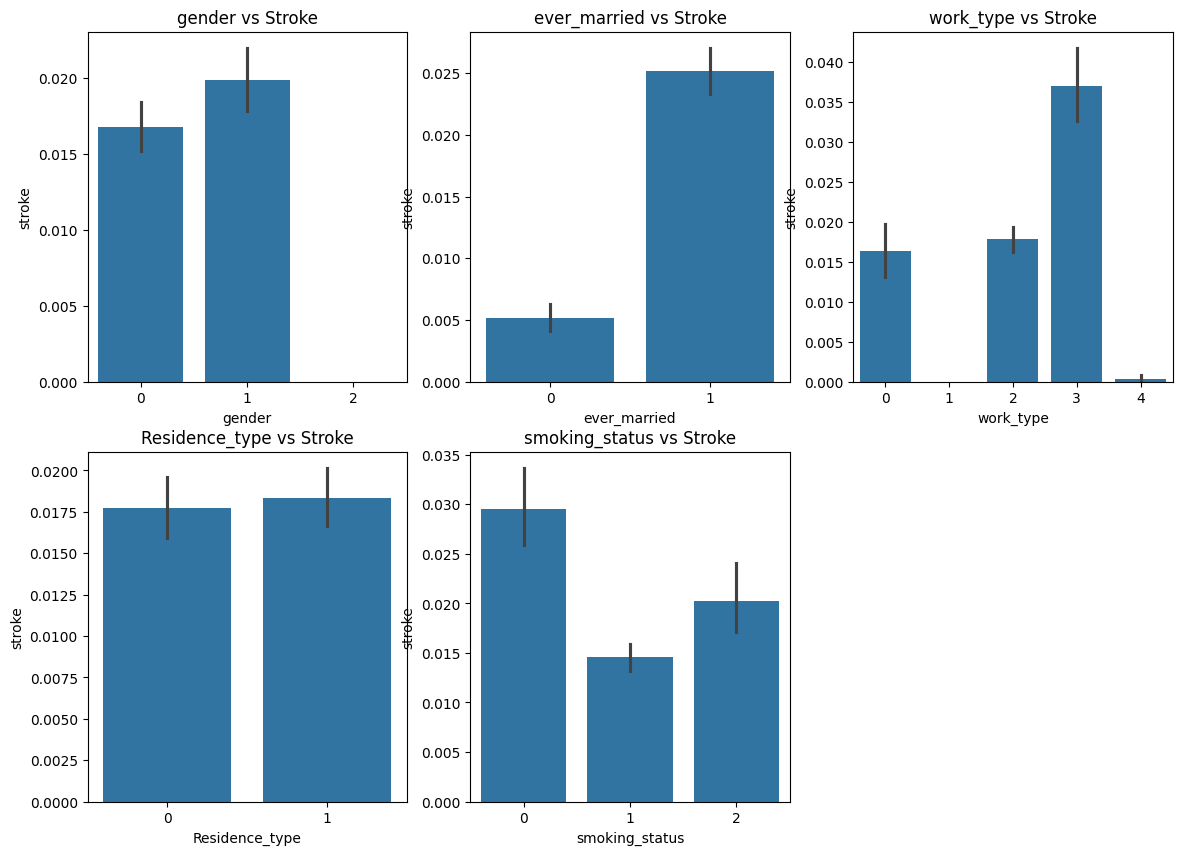

In [ ]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=df[col], y=df['stroke'])
    plt.title(f'{col} vs Stroke')
plt.show()

***Evaluating Classifier Performance***

1. **Model Selection**:
   - Initializes multiple classifiers including Random Forest, Logistic Regression, Gradient Boosting, SVC, KNN, and Decision Tree.

2. **Model Training and Evaluation**:
   - Trains each classifier on the SMOTE-resampled training data (`X_resampled`, `y_resampled`).
   - Evaluates the performance of each classifier on the test set (`X_test`, `y_test`) using accuracy score.




> We hence find that Random Forest and Decision tree has accuracy around 95% (highest accuracy) and the rest of the model to be low, hence we consider Random forest as the feasible model



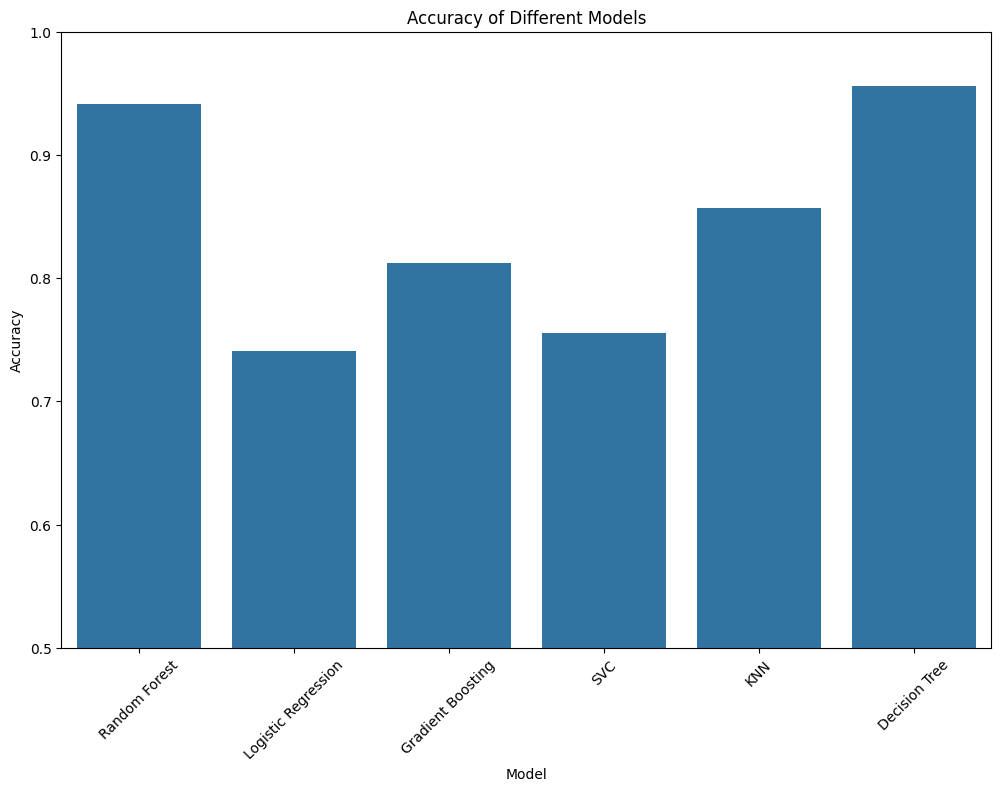

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy


plt.figure(figsize=(12, 8))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0.5, 1.0)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

**`ROC Curve Evaluation Finding `**

>I conducted ROC curve evaluation and obtained an area under the curve (AUC) of **0.76.**

This value indicates that the model's ability to distinguish between positive and negative classes is **reasonably good**.

>An AUC of 0.76 suggests that there is a 76% chance that the model will correctly distinguish between a randomly chosen positive instance (stroke) and a randomly chosen negative instance (no stroke).

Generally, an AUC value closer to 1 indicates better predictive performance.

With an AUC of 0.76, the model performance can be considered moderate to good, indicating that it has a reasonably strong ability to discriminate between stroke and non-stroke cases.


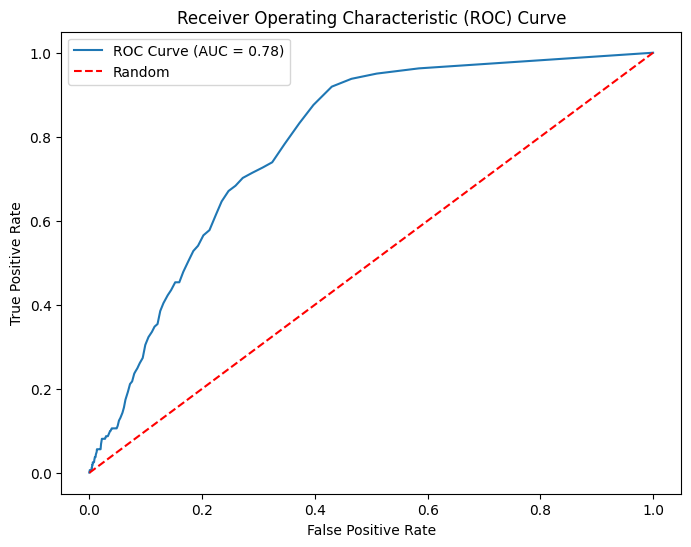

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_resampled, y_resampled)

y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**`Precision-Recall Curve Evaluation Finding`**

>I conducted precision-recall curve evaluation and obtained a precision-recall AUC of **0.05.**

This value indicates that the model's precision-recall performance is relatively poor. A precision-recall AUC of 0.05 suggests that the model may **struggle to achieve both high precision and high recall** simultaneously. Typically, higher values closer to 1 indicate better precision-recall performance.

>With a precision-recall AUC of 0.05, the model's ability to correctly identify positive instances (stroke) while minimizing false positives (non-stroke incorrectly classified as stroke) and false negatives (stroke incorrectly classified as non-stroke) is quite limited.


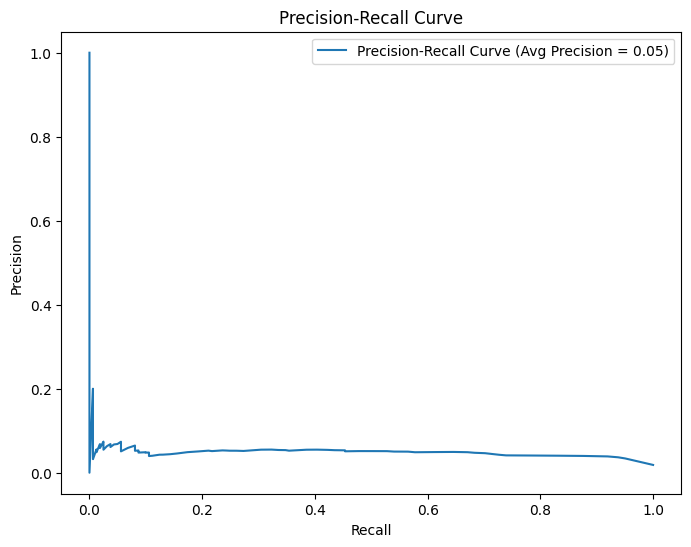

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (Avg Precision = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**`Confusion Matrix Evaluation Finding`**

I analyzed the confusion matrix and obtained the following results:

- True Positives (TP): 8157 (no stroke)
- False Negatives (FN): 362
- False Positives (FP): 144
- True Negatives (TN): 17 (stroke)

>These values indicate that the model correctly predicted 8157 instances of 'no stroke' (TP) and 17 instances of 'stroke' (TN). However, it incorrectly predicted 362 instances of 'stroke' as 'no stroke' (FN) and 144 instances of 'no stroke' as 'stroke' (FP).





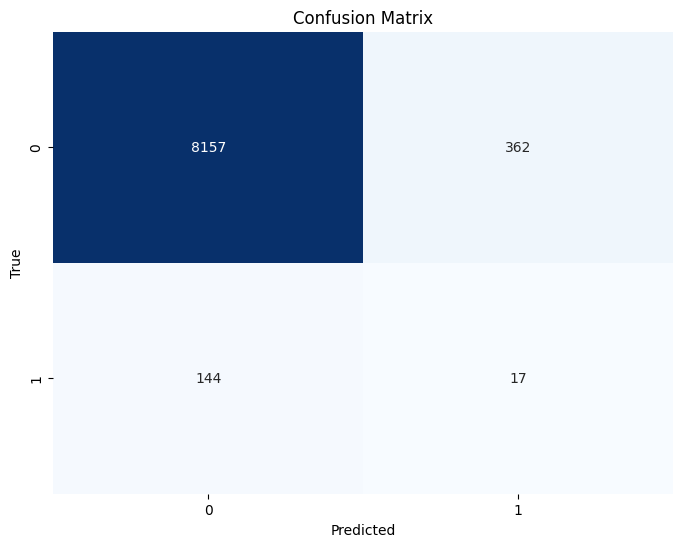

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**`Learning Curve Analysis with Performance Metrics`**

- **High Training Score (100%)**: Indicates the model fits the training data perfectly, including instances from the minority class if adequately represented.

- **High CV Score (98.5%)**: Shows strong performance on validation or test data, including instances from the minority class, suggesting robust generalization.

>Despite high training and CV scores, the ROC AUC of 0.75 and precision-recall AUC of 0.05 indicate discrepancies in the model's ability to correctly classify minority class instances. A ROC AUC of 0.75 suggests moderate discrimination ability, while a low precision-recall AUC of 0.05 indicates poor performance in balancing precision and recall for the minority class.

This discrepancy suggests that while the model achieves high overall accuracy and generalization, it may struggle with correctly identifying and classifying instances from the minority class.


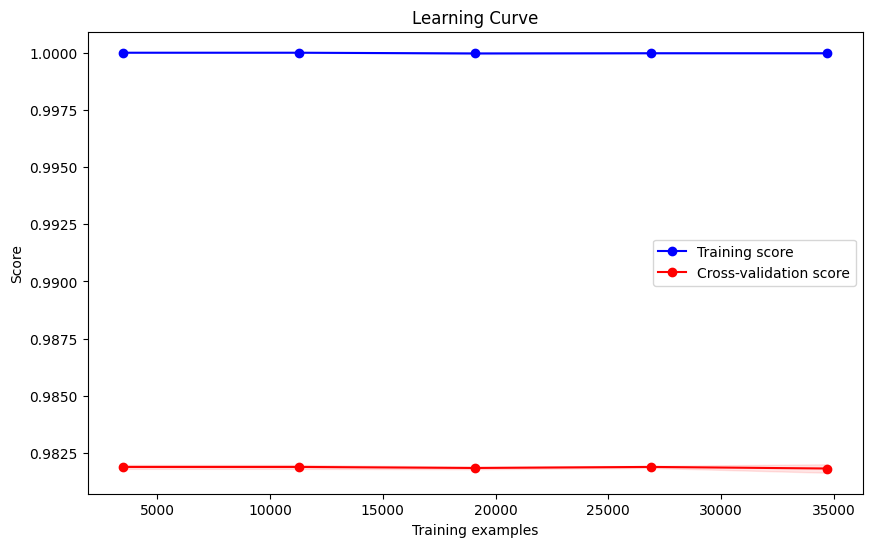

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

**Before Sampling**

**`Evaluating Classifier Performance`**

1. **Model Selection**:
   - Initializes multiple classifiers including Random Forest, Logistic Regression, Gradient Boosting, SVC, KNN, and Decision Tree.

2. **Model Training and Evaluation**:
   - Trains each classifier on the unsampled training data.
   - Evaluates the performance of each classifier on the test set (`X_test`, `y_test`) using accuracy score.
   - During evaluation, all models achieved a similar high accuracy of approximately 97.5%.
   - Based on ensemble learning principles and consistently high performance, Random Forest is recommended as the preferred model.

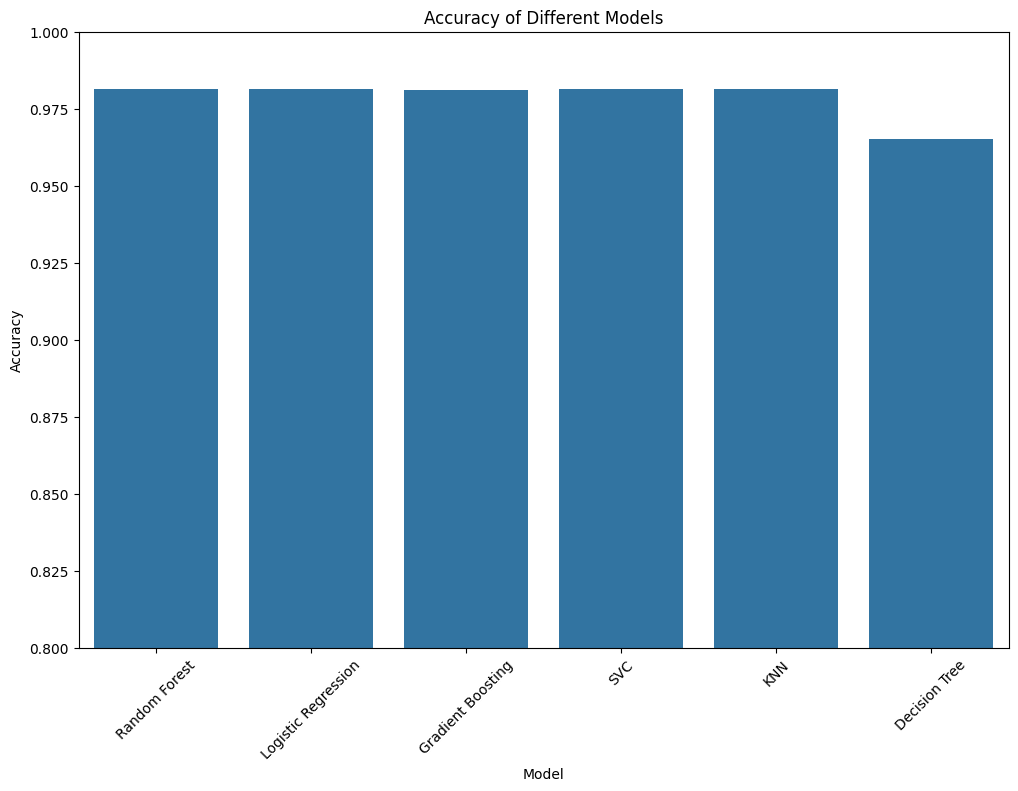

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy


plt.figure(figsize=(12, 8))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0.8, 1.0)
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

**`ROC Curve Evaluation Finding `**

>Found to be the same as the sampling method

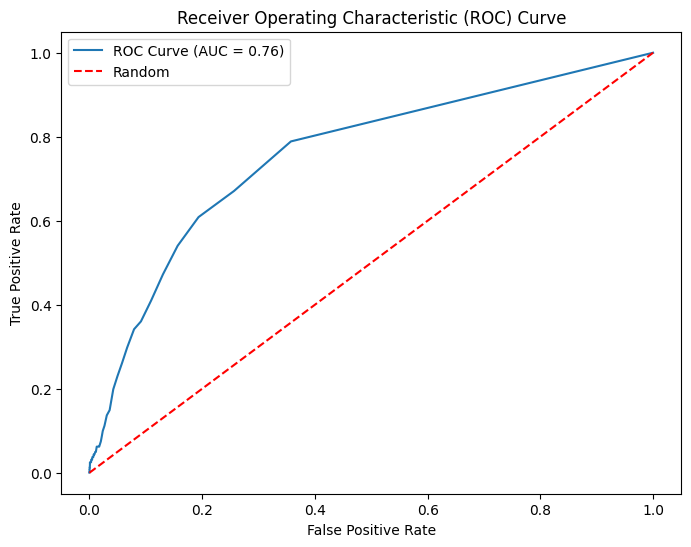

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**`Precision-Recall Curve Evaluation Finding`**

> Found to be the same as the sampling method

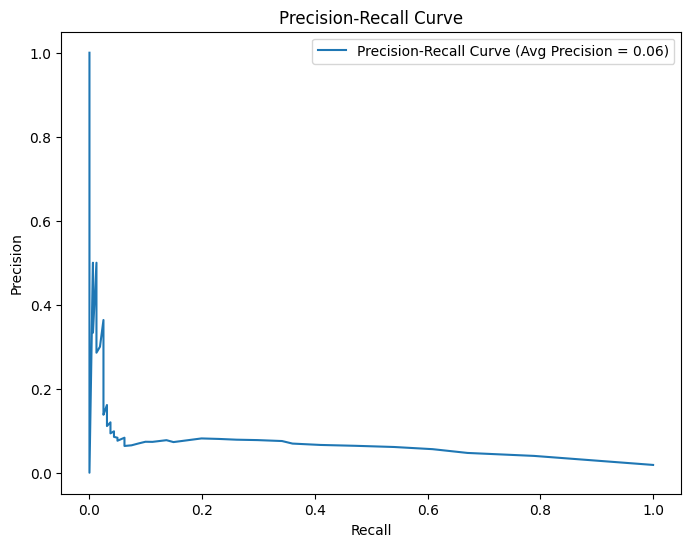

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (Avg Precision = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


**`Confusion Matrix Evaluation Finding`**

Upon analyzing the confusion matrix, the results are as follows:

- True Positives (TP): 8518 (instances correctly predicted as 'no stroke')
- False Negatives (FN): 1 (instances incorrectly predicted as 'no stroke' when they were actually 'stroke')
- False Positives (FP): 160 (instances incorrectly predicted as 'stroke' when they were actually 'no stroke')
- True Negatives (TN): 1 (instances correctly predicted as 'stroke')

>These findings reveal that while the model accurately predicts 'no stroke' in most cases (high TP), it occasionally misclassifies 'stroke' cases as 'no stroke' (FN) and 'no stroke' cases as 'stroke' (FP), highlighting areas where the model can improve its discrimination between the classes.



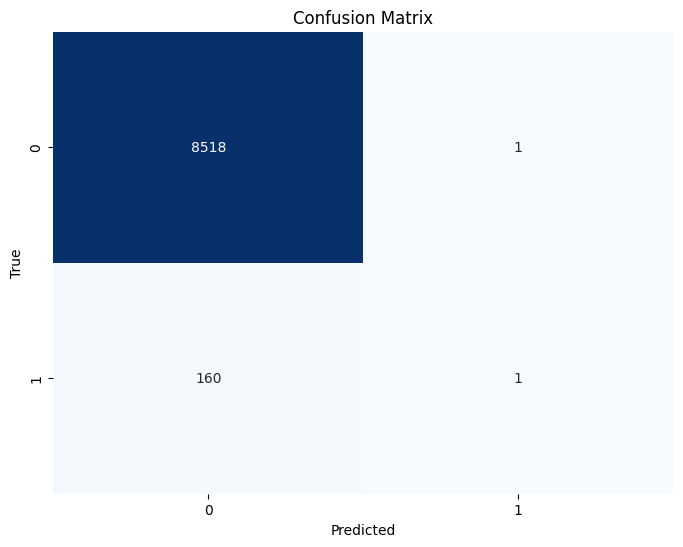

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**`Learning Curve Analysis with Performance Metrics`**

>Despite high training and CV scores, the ROC AUC of 0.75 and precision-recall AUC of 0.05 indicate discrepancies in the model's ability to correctly classify minority class instances. A ROC AUC of 0.75 suggests moderate discrimination ability, while a low precision-recall AUC of 0.05 indicates poor performance in balancing precision and recall for the minority class.

This discrepancy suggests that while the model achieves high overall accuracy and generalization, it may struggle with correctly identifying and classifying instances from the minority class.

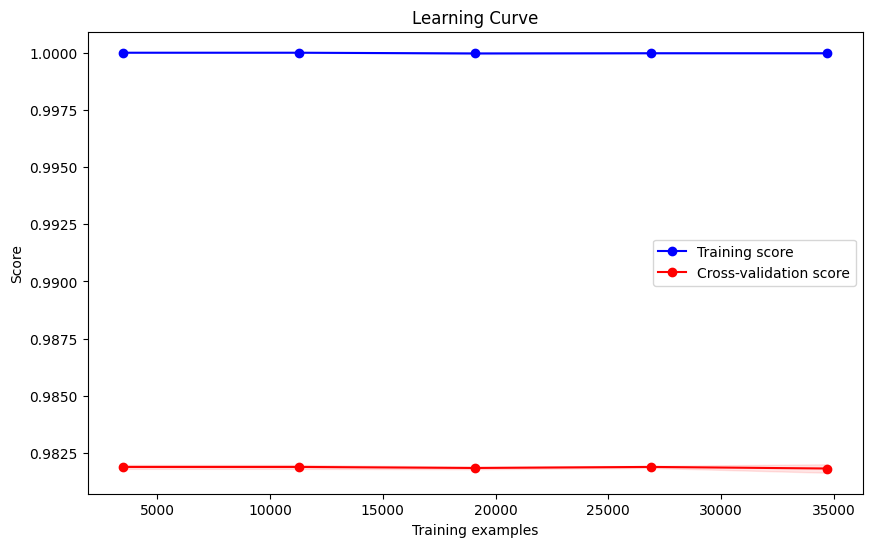

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

**`EDA`**

In [ ]:
df1=pd.read_csv("Cereberal_Dataset.csv")

**Here, we visualize the distributions of numerical features from DataFrame `df1`:**

- **Age Distribution**: Appears to be normal or approximately symmetric around the mean.
- **Average Glucose Level Distribution**: Shows a positively skewed distribution, indicating a concentration of values towards the lower end with a tail extending to higher values.
- **BMI Distribution**: Also exhibits a positively skewed distribution, suggesting most values are concentrated at the lower end with a tail extending towards higher values.

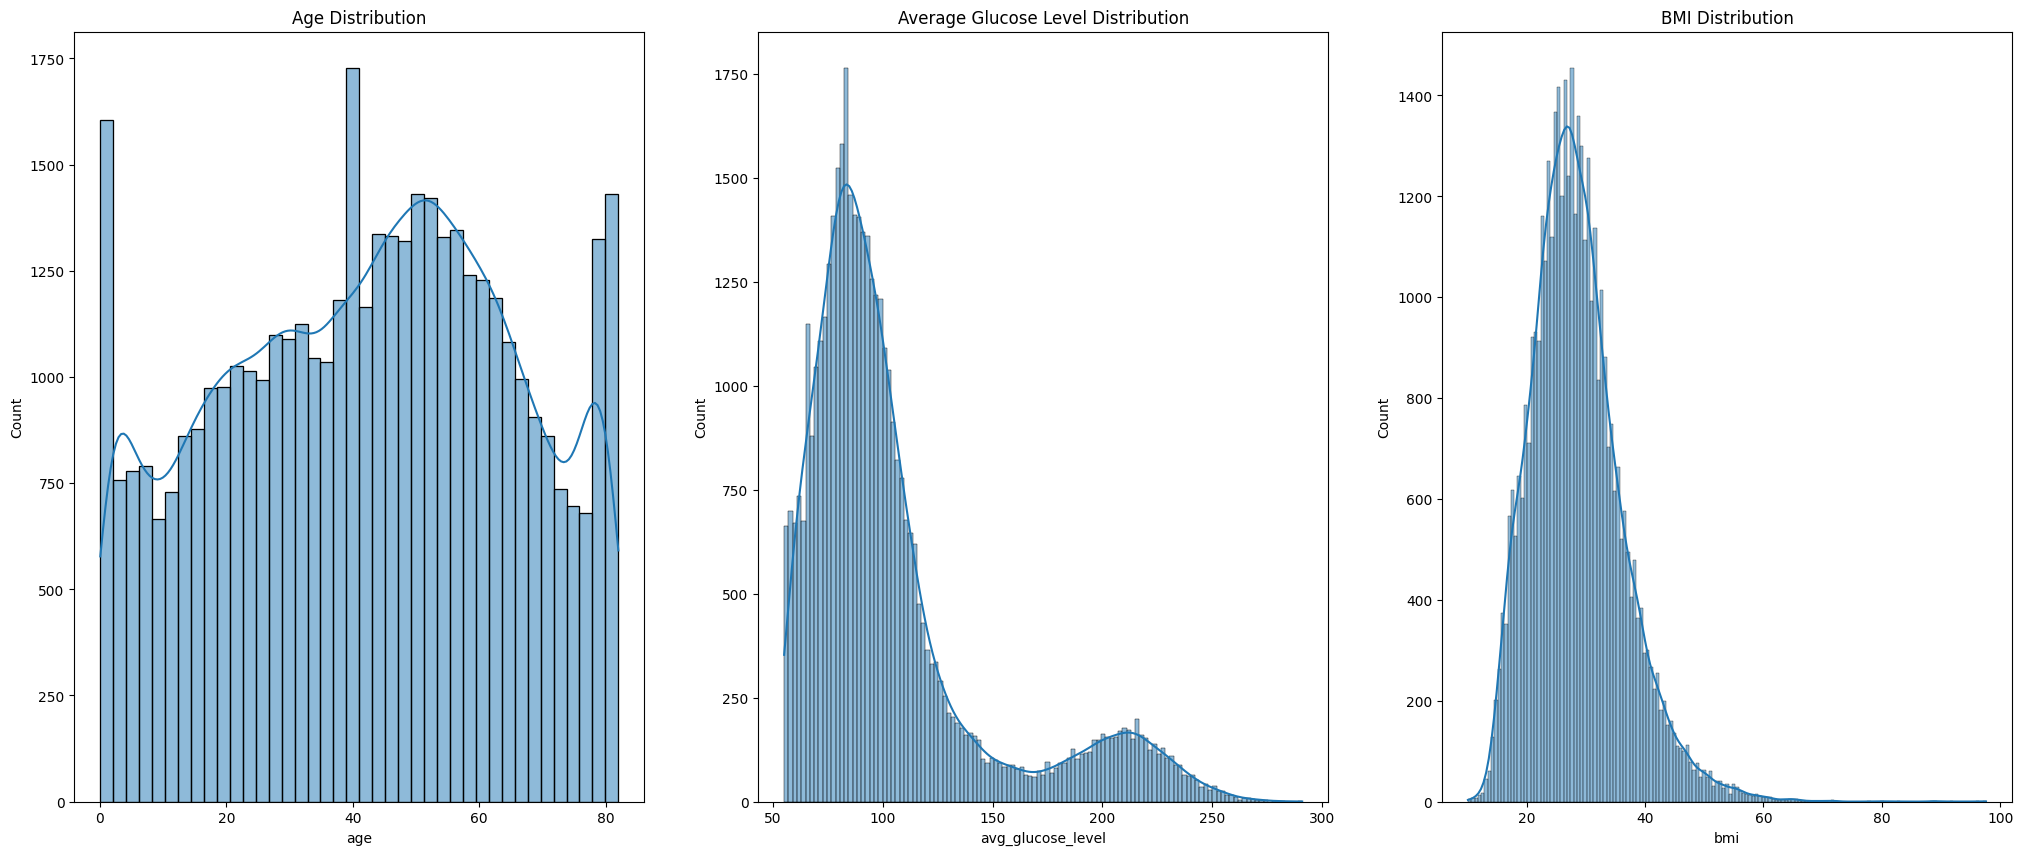

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,10))

sns.histplot(df1['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df1['avg_glucose_level'], kde=True, ax=axes[1])
axes[1].set_title('Average Glucose Level Distribution')

sns.histplot(df1['bmi'], kde=True, ax=axes[2])
axes[2].set_title('BMI Distribution')

plt.show()

We generate a 2x3 grid of count plots to visualize categorical variables from DataFrame `df1`:

- **Gender Count**: Displays the distribution of genders, highlighted in red.
- **Hypertension Count**: Shows the count of hypertension cases.
- **Heart Disease Count**: Illustrates the occurrence of heart disease cases, highlighted in green.
- **Ever Married Count**: Indicates the distribution of individuals based on marital status, highlighted in violet.
- **Work Type Count**: Represents the distribution across different types of work, highlighted in yellow.
- **Residence Type Count**: Displays the distribution of residence types, highlighted in black.

These provide insights into the distribution and frequency of categorical variables, aiding in understanding the health-related characteristics.


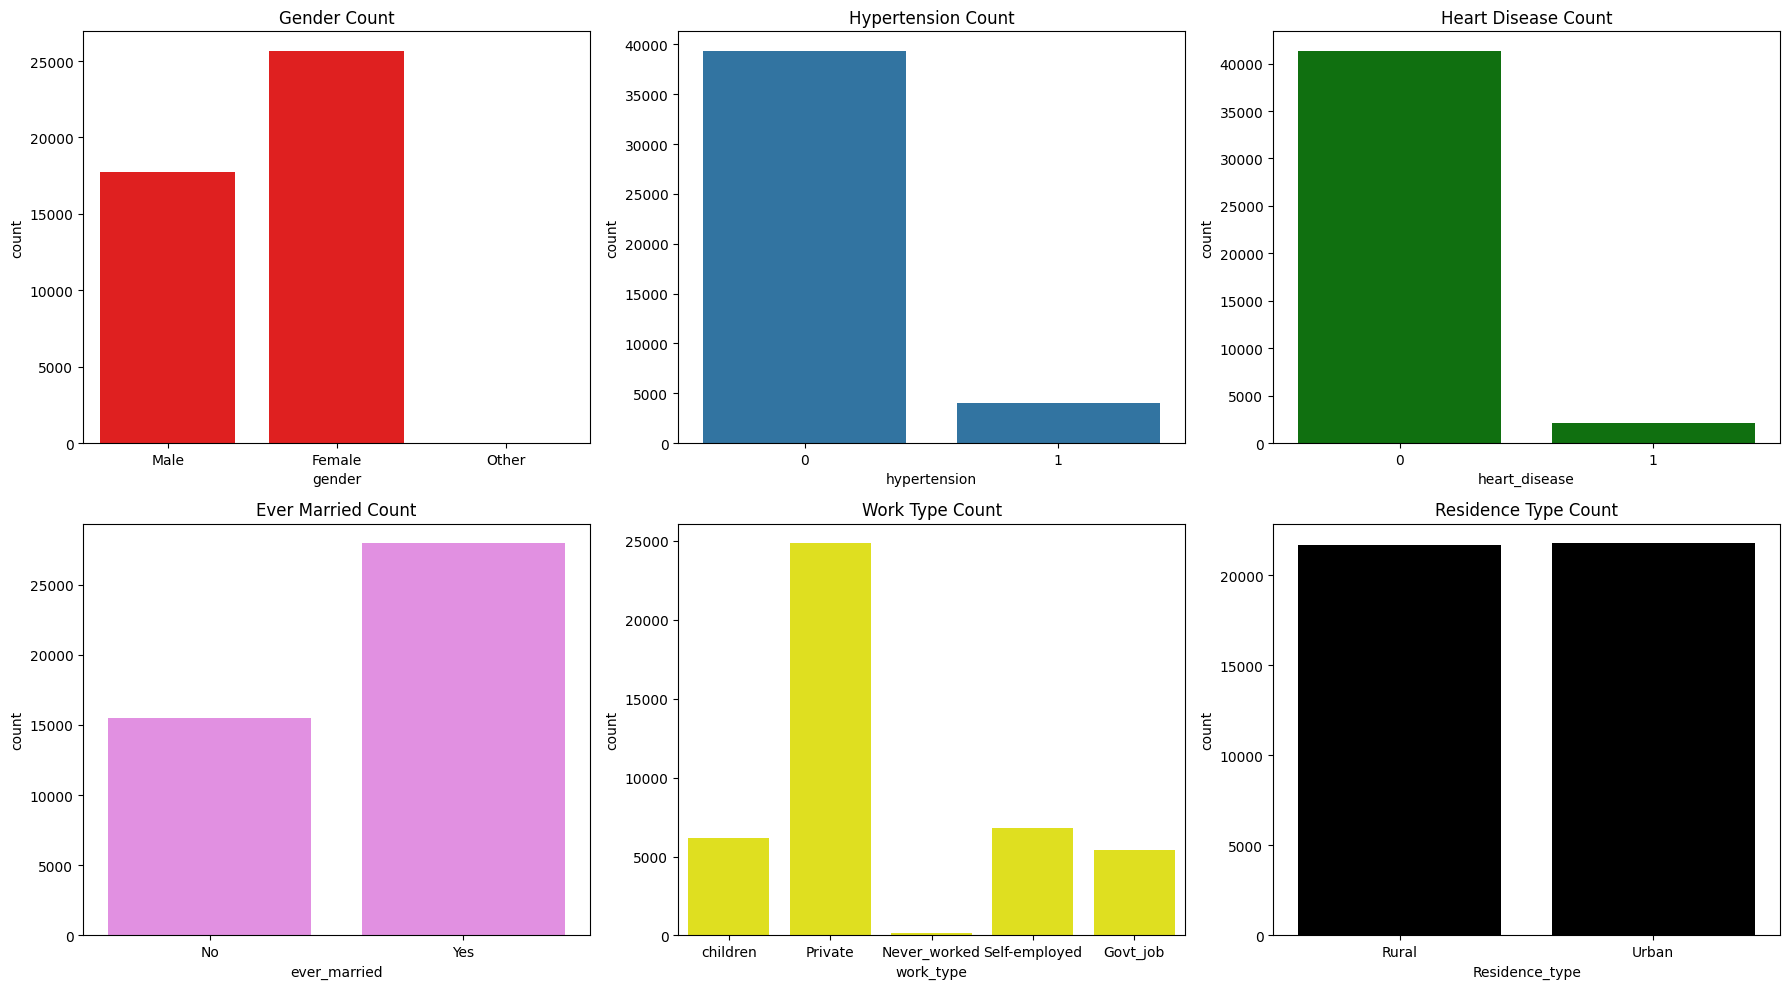

In [ ]:
# Count plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(data=df1, x='gender', ax=axes[0, 0],color='red')
axes[0, 0].set_title('Gender Count')

sns.countplot(data=df1, x='hypertension', ax=axes[0, 1])
axes[0, 1].set_title('Hypertension Count')

sns.countplot(data=df1, x='heart_disease', ax=axes[0, 2],color='green')
axes[0, 2].set_title('Heart Disease Count')

sns.countplot(data=df1, x='ever_married', ax=axes[1, 0],color='violet')
axes[1, 0].set_title('Ever Married Count')

sns.countplot(data=df1, x='work_type', ax=axes[1, 1],color='yellow')
axes[1, 1].set_title('Work Type Count')

sns.countplot(data=df1, x='Residence_type', ax=axes[1, 2],color='black')
axes[1, 2].set_title('Residence Type Count')

plt.tight_layout()
plt.show()


**`Finding from Box Plot Analysis`**

In the box plots comparing numerical features by gender in DataFrame `df1`:

- **Average Glucose Level by Gender**: Displays several outliers beyond the upper whisker, indicating significant variation in average glucose levels among genders.
- **BMI by Gender**: Shows numerous outliers beyond the upper whisker, suggesting substantial variability in BMI values across different genders.

These outliers, represented as points outside the box plots, highlight the presence of extreme values that may influence the overall distribution and statistical analysis of these variables by gender.


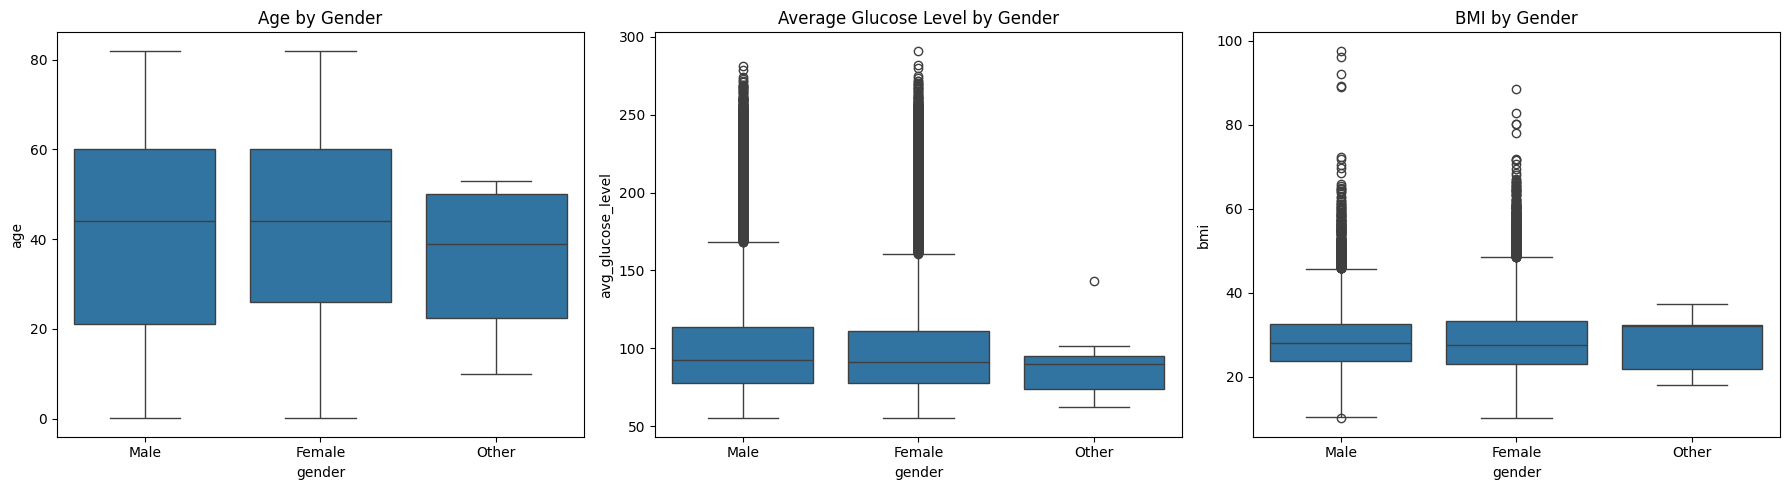

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df1, x='gender', y='age', ax=axes[0])
axes[0].set_title('Age by Gender')

sns.boxplot(data=df1, x='gender', y='avg_glucose_level', ax=axes[1])
axes[1].set_title('Average Glucose Level by Gender')

sns.boxplot(data=df1, x='gender', y='bmi', ax=axes[2])
axes[2].set_title('BMI by Gender')

plt.tight_layout()
plt.show()


**The heatmap indicates that all pairs of numerical variables in DataFrame `df1` have correlation values less than 0.36. This suggests:**

- **Weak to Moderate Relationships**: The variables are loosely correlated, implying changes in one variable may not strongly predict changes in another. This can reduce concerns about multicollinearity in predictive modeling.

- **Independent Contributions**: Each variable may independently contribute unique information to the model. Weak correlations imply that including multiple variables may provide complementary insights rather than redundant information.


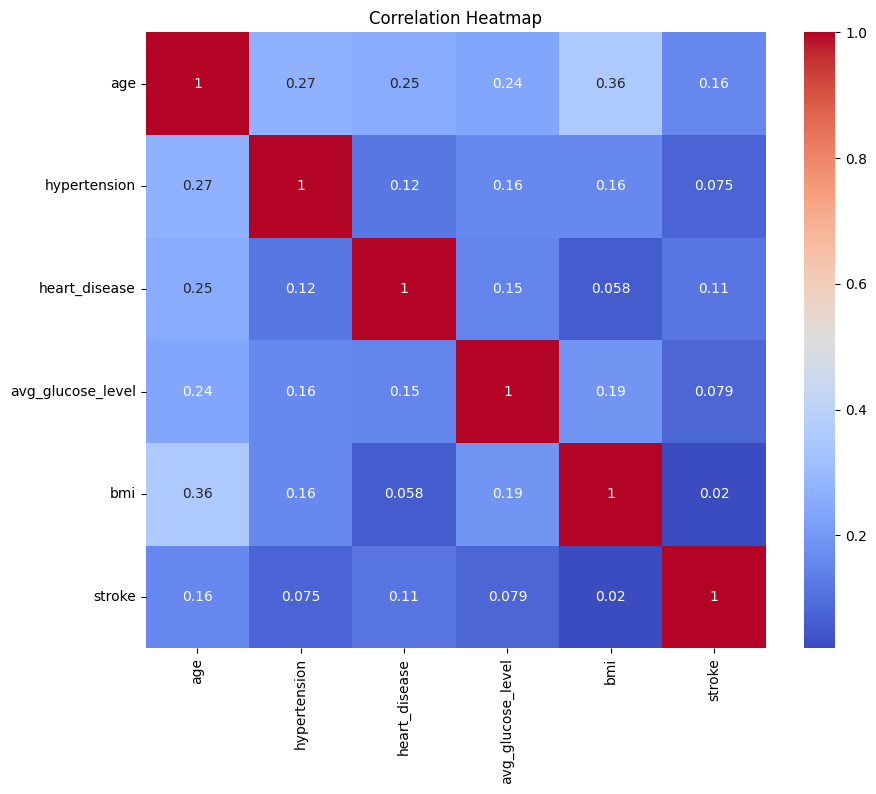

In [ ]:
numeric_df = df1.drop(columns=['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**The scatter plot visualizes the relationship between 'avg_glucose_level' and 'bmi' from the first 1500 rows of DataFrame `df1`, color-coded by the 'stroke' variable:**

- **Blue Points (Stroke=0)**: Predominantly more in number, indicating instances where stroke did not occur.
- **Orange Points (Stroke=1)**: Fewer in number, representing instances where stroke occurred.

This visualization helps in understanding how 'avg_glucose_level' and 'bmi' relate to the occurrence of stroke, highlighting potential patterns or associations between these variables and the target outcome.


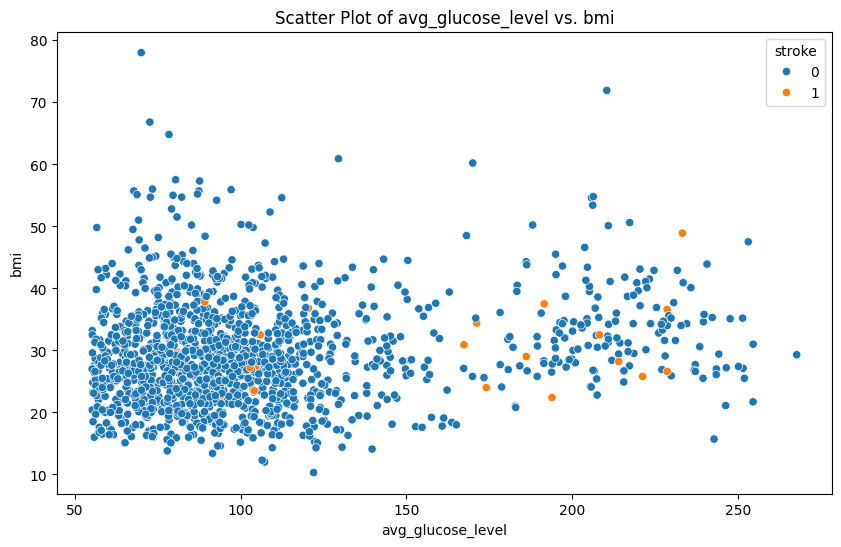

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df1[:1500], hue='stroke')
plt.title('Scatter Plot of avg_glucose_level vs. bmi')
plt.show()

**The violin plot illustrates the distribution of 'age' with respect to the occurrence of stroke ('stroke' variable), differentiated by marital status ('ever_married') in DataFrame `df1`:**

- For **Stroke = 0** (no stroke):
  - The distribution appears distorted, indicating varying densities across different age groups, particularly among those who are married and unmarried.
  
- For **Stroke = 1** (stroke):
  - The distribution is more uniform in the upper half of the plot, suggesting a consistent age profile among those who experienced a stroke, regardless of marital status.


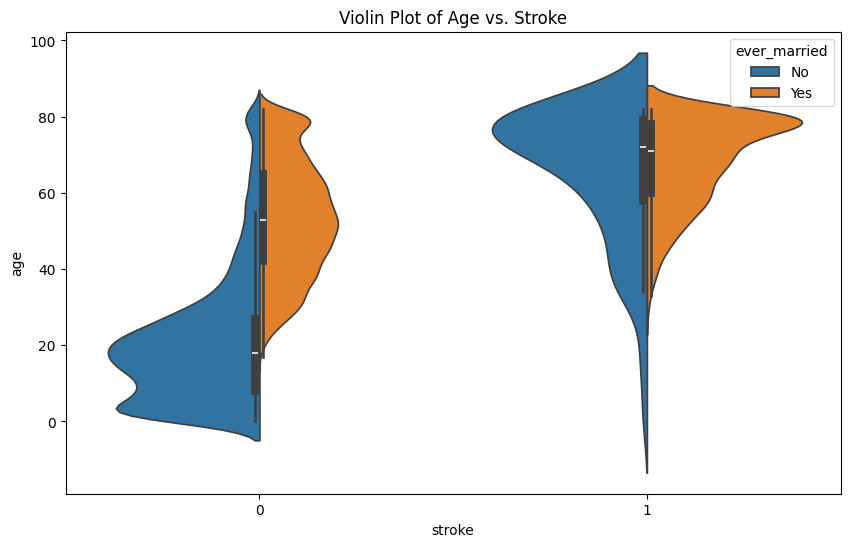

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='stroke', y='age', data=df1, hue='ever_married', split=True)
plt.title('Violin Plot of Age vs. Stroke')
plt.show()

**The violin plot visualizes the distribution of 'avg_glucose_level' across different residence types ('Residence_type'), differentiated by marital status ('ever_married') in DataFrame `df1`:**

- **Urban Residence (Residence_type = Urban)**:
  - The distribution of average glucose levels appears uniform across marital statuses (ever_married), particularly noticeable in the lower half of the plot.
  
- **Rural Residence (Residence_type = Rural)**:
  - Similarly, the distribution of average glucose levels is also uniform across marital statuses, mirroring the pattern observed in urban areas.


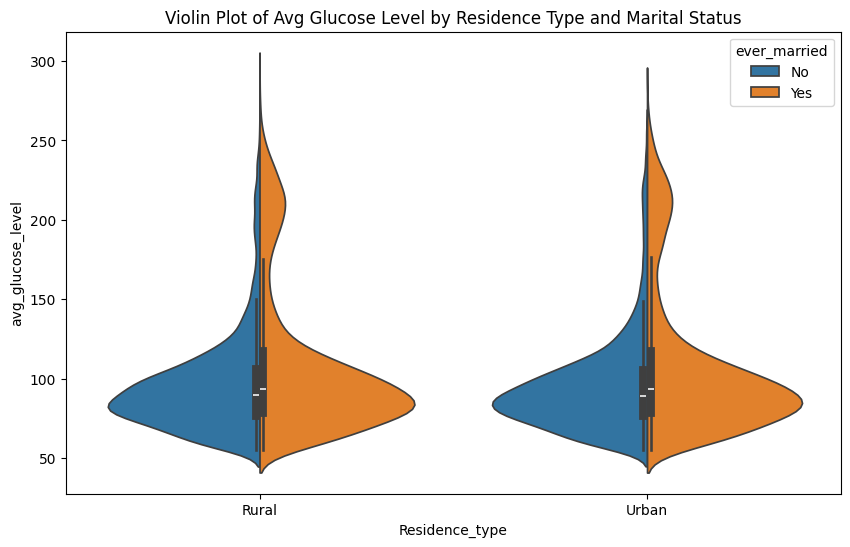

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Residence_type', y='avg_glucose_level', data=df1, hue='ever_married', split=True)
plt.title('Violin Plot of Avg Glucose Level by Residence Type and Marital Status')
plt.show()

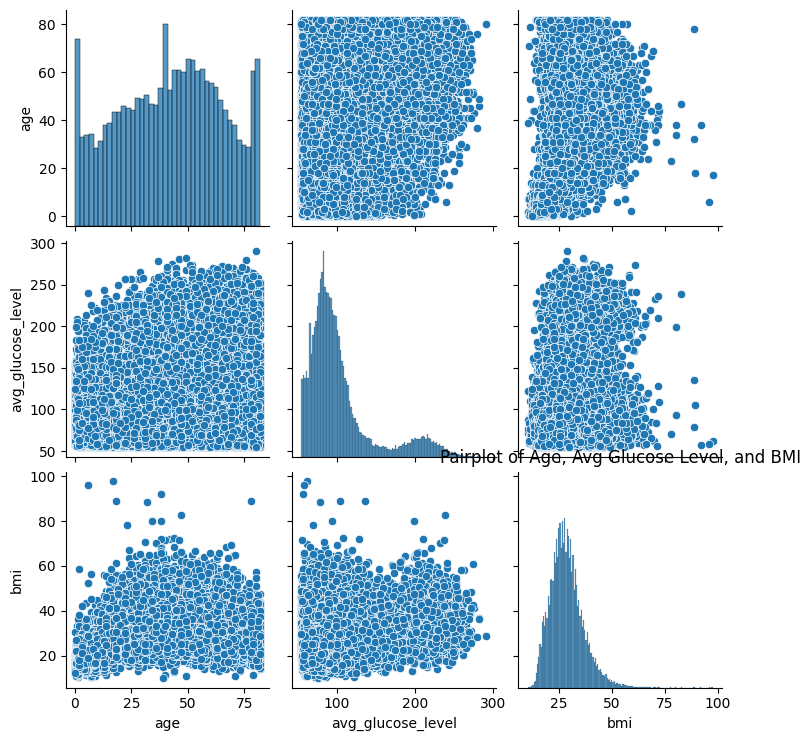

In [ ]:
sns.pairplot(df1[['age', 'avg_glucose_level', 'bmi']])
plt.title('Pairplot of Age, Avg Glucose Level, and BMI')
plt.show()

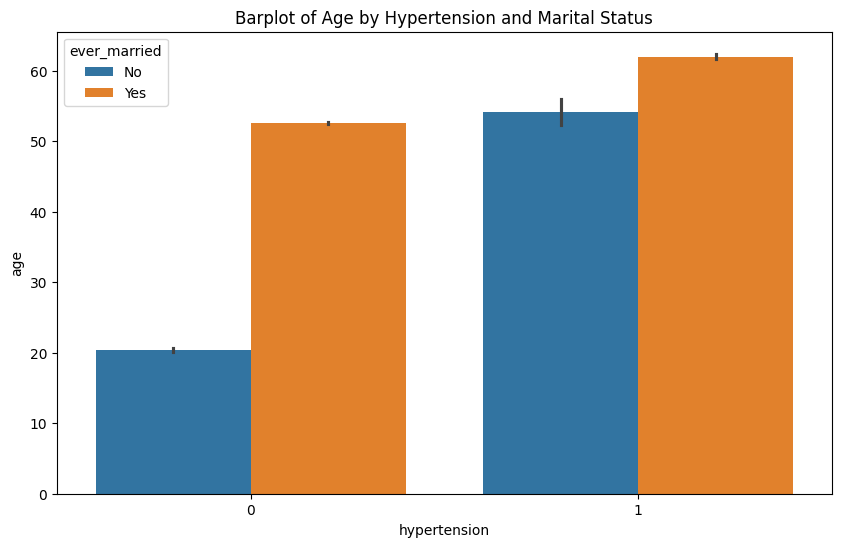

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hypertension', y='age', data=df1, hue='ever_married')
plt.title('Barplot of Age by Hypertension and Marital Status')
plt.show()

**The stackplot visualizes the cumulative counts of hypertension and heart disease cases across age groups in DataFrame `df1`:**

- **Hypertension**: Shows an increasing trend from age groups 0-18 to 66-100, with notable increments observed in earlier age groups up to 1500.
  
- **Heart Disease**: Displays a steady increase from age groups 0-18 to 66-100, with significant accumulations observed across all age groups up to 3000.


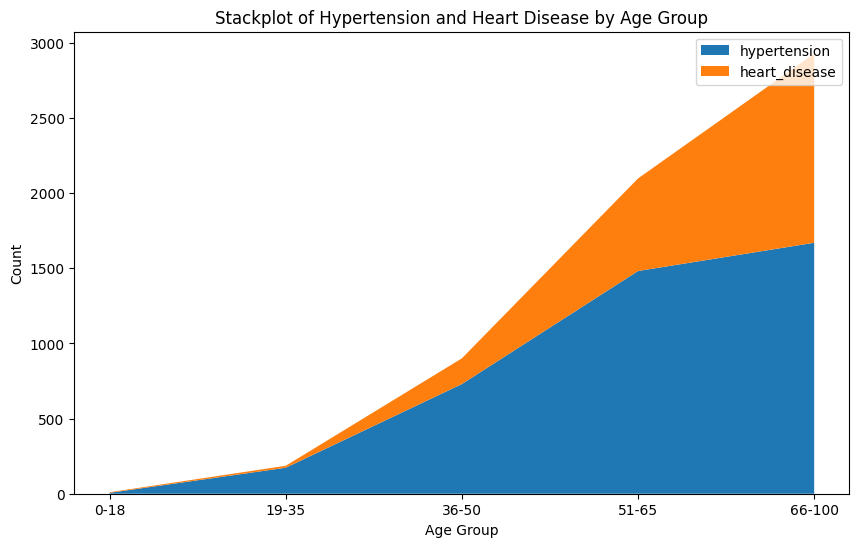

In [ ]:
age_groups = pd.cut(df1['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-100'])
stackplot_data = df1.groupby(age_groups)[['hypertension', 'heart_disease']].sum().T

plt.figure(figsize=(10, 6))
plt.stackplot(stackplot_data.columns, stackplot_data.values, labels=stackplot_data.index)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Stackplot of Hypertension and Heart Disease by Age Group')
plt.legend()
plt.show()

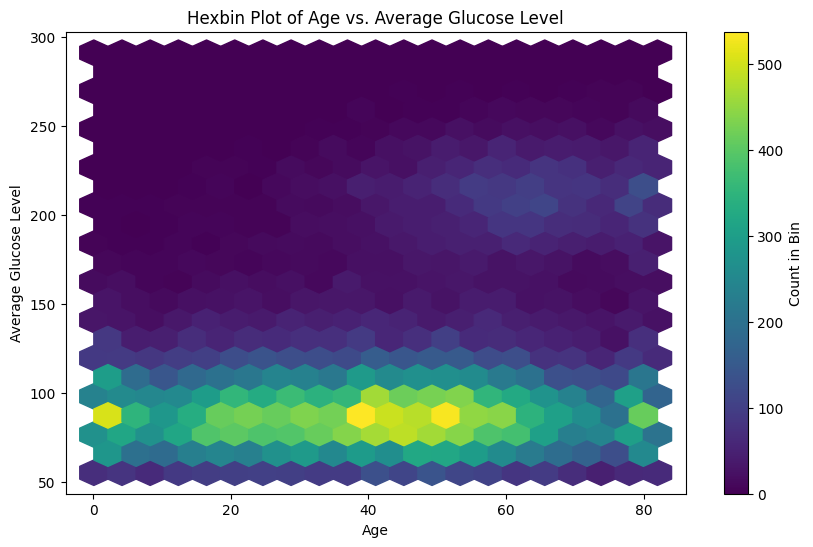

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(df1['age'], df1['avg_glucose_level'], gridsize=20, cmap='viridis')
plt.colorbar(label='Count in Bin')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Hexbin Plot of Age vs. Average Glucose Level')
plt.show()

**`K Cross Validation`**

The Stratified K-Fold cross-validation with 40 splits and a RandomForestClassifier model yielded the following results:

- **Cross-Validation Accuracy Scores**: Range from approximately 0.9806 to 0.9825 across different folds, indicating consistent performance.
  
- **Mean Cross-Validation Accuracy**: Achieved an average accuracy of approximately 98.18%.

These scores suggest that the model performs consistently well across different subsets of the data, demonstrating robustness and reliability in predicting outcomes based on the given features.


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
kfold = StratifiedKFold(n_splits=40, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

Cross-Validation Accuracy Scores: [0.98248848 0.98248848 0.98248848 0.98248848 0.98248848 0.98248848
 0.98156682 0.98248848 0.98248848 0.98248848 0.98248848 0.98248848
 0.98248848 0.98248848 0.98248848 0.98248848 0.98156682 0.98156682
 0.98156682 0.98064516 0.98156682 0.98156682 0.98064516 0.98156682
 0.98064516 0.98156682 0.98156682 0.98064516 0.98248848 0.98156682
 0.98064516 0.98156682 0.98156682 0.98156682 0.98156682 0.98156682
 0.98064516 0.98156682 0.98156682 0.98156682]
Mean Cross-Validation Accuracy: 0.9817972350230413


- **`Feature Importance Analysis`**:
  - Computes feature importances based on the trained Random Forest model to understand which features are most influential in predicting the target variable.
  - Here age, glucose level, bmi are considered as the top 3 features, so we give more priority to these features

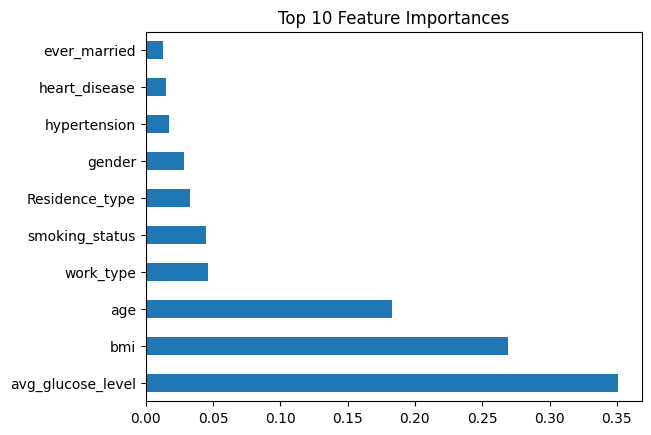

In [ ]:
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

**`Precision-Recall Curve Evaluation Finding`**

>I conducted precision-recall curve evaluation and obtained a precision-recall AUC of **0.05.**

This value indicates that the model's precision-recall performance is relatively poor. A precision-recall AUC of 0.05 suggests that the model may **struggle to achieve both high precision and high recall** simultaneously. Typically, higher values closer to 1 indicate better precision-recall performance.

>With a precision-recall AUC of 0.05, the model's ability to correctly identify positive instances (stroke) while minimizing false positives (non-stroke incorrectly classified as stroke) and false negatives (stroke incorrectly classified as non-stroke) is quite limited.


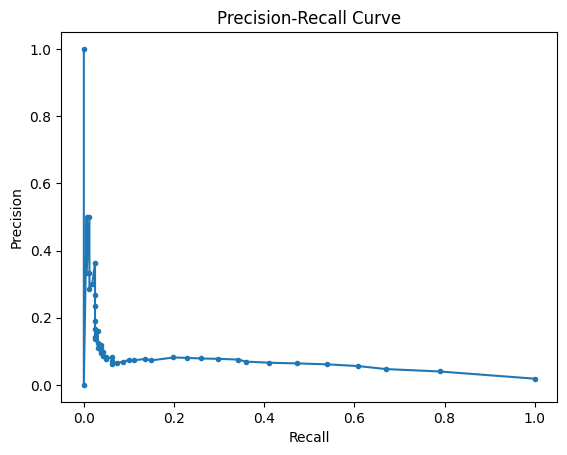

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

**`ROC Curve Evaluation Finding `**

>I conducted ROC curve evaluation and obtained an area under the curve (AUC) of **0.76.**

This value indicates that the model's ability to distinguish between positive and negative classes is **reasonably good**.

>An AUC of 0.76 suggests that there is a 76% chance that the model will correctly distinguish between a randomly chosen positive instance (stroke) and a randomly chosen negative instance (no stroke).

Generally, an AUC value closer to 1 indicates better predictive performance.

With an AUC of 0.76, the model performance can be considered moderate to good, indicating that it has a reasonably strong ability to discriminate between stroke and non-stroke cases.

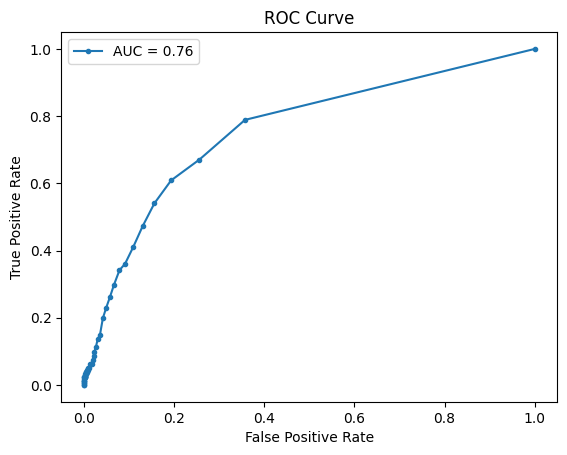

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, marker='.', label=f'AUC = {roc_auc:.2f}')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**`Confusion Matrix Evaluation Finding`**

Upon analyzing the confusion matrix, the results are as follows:

- True Positives (TP): 8518 (instances correctly predicted as 'no stroke')
- False Negatives (FN): 1 (instances incorrectly predicted as 'no stroke' when they were actually 'stroke')
- False Positives (FP): 160 (instances incorrectly predicted as 'stroke' when they were actually 'no stroke')
- True Negatives (TN): 1 (instances correctly predicted as 'stroke')

>These findings reveal that while the model accurately predicts 'no stroke' in most cases (high TP), it occasionally misclassifies 'stroke' cases as 'no stroke' (FN) and 'no stroke' cases as 'stroke' (FP), highlighting areas where the model can improve its discrimination between the classes.

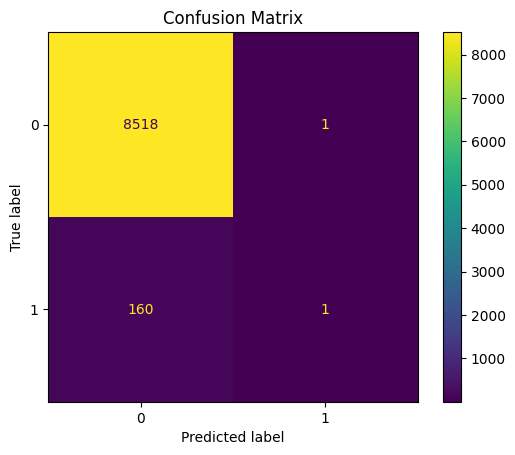

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

**`Learning Curve Analysis with Performance Metrics`**

>Despite high training and CV scores, the ROC AUC of 0.75 and precision-recall AUC of 0.05 indicate discrepancies in the model's ability to correctly classify minority class instances. A ROC AUC of 0.75 suggests moderate discrimination ability, while a low precision-recall AUC of 0.05 indicates poor performance in balancing precision and recall for the minority class.

This discrepancy suggests that while the model achieves high overall accuracy and generalization, it may struggle with correctly identifying and classifying instances from the minority class.

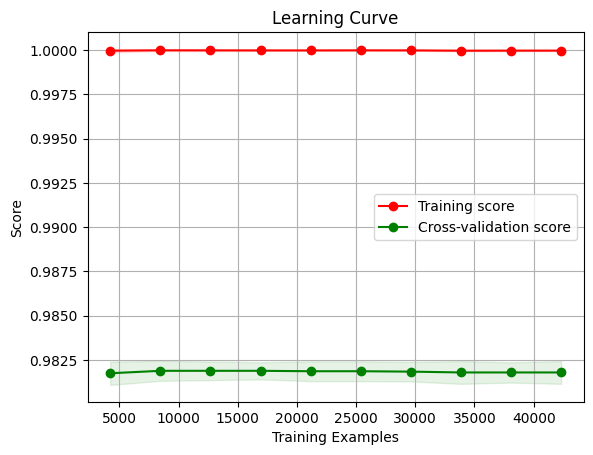

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=kfold, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, ConfusionMatrixDisplay

**`Performance Metrics After Cross-Validation:`**

- **Accuracy:** 0.98
- **Precision:** 0.50
- **Recall:** 0.01
- **F1 Score:** 0.01
- **ROC AUC:** 0.76

These metrics evaluate the performance of the model after cross-validation. While accuracy is high, indicating overall correct predictions, low precision, recall, and F1 score suggest challenges in correctly identifying instances of the minority class ('stroke'). The ROC AUC score of 0.76 reflects moderate discriminative ability in distinguishing between positive and negative cases.


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\nPerformance Metrics After Cross-Validation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")



Performance Metrics After Cross-Validation:
Accuracy: 0.98
Precision: 0.50
Recall: 0.01
F1 Score: 0.01
ROC AUC: 0.76


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from numpy import mean, std

rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}


outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)

model = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=inner_cv, n_jobs=-1
)

scores = cross_val_score(model, X, y,
                        scoring='accuracy',
                        cv=outer_cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)


**`XGBoost Algorithm`**


**`Grid Search Results:`**

- **Best Parameters found:**
  - `colsample_bytree`: 1.0
  - `learning_rate`: 0.1
  - `max_depth`: 3
  - `n_estimators`: 100
  - `subsample`: 1.0

- **Best ROC AUC Score:** 0.86

>Grid Search Cross-Validation *(GridSearchCV)* explores different combinations of hyperparameters for the *XGBoostClassifier.* It uses 5-fold *StratifiedKFold* cross-validation to evaluate each combination's performance based on ROC AUC scoring, aiming to find the set of parameters that maximizes predictive performance.

- The selected parameters optimize the model's ability to distinguish between positive and negative cases, achieving an ROC AUC score of 0.86.

- This indicates improved discriminative power compared to the initial model, suggesting better performance in predicting outcomes.

- This ROC AUC score of 0.86 is generally considered good, indicating that the model performs well in distinguishing between stroke and non-stroke cases.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)


In [ ]:
grid_search.fit(X, y)


print("Best Parameters found: ", grid_search.best_params_)
print("Best ROC AUC Score: {:.2f}".format(grid_search.best_score_))

Best Parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best ROC AUC Score: 0.86


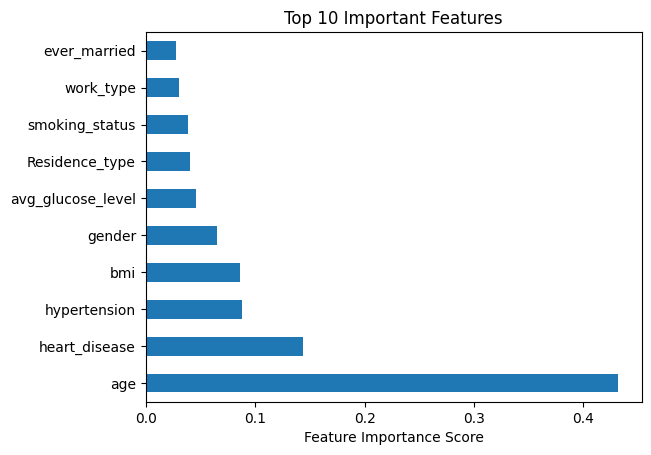

In [ ]:
best_model = grid_search.best_estimator_

feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.show()

**XGBOOST WITH OVERSAMPLING**

**`Grid Search Results:`**

- **Best Parameters found:**
  - `colsample_bytree`: 1.0
  - `learning_rate`: 0.2
  - `max_depth`: 7
  - `n_estimators`: 200
  - `subsample`: 0.8

- **Best ROC AUC Score:** 0.99

>**Grid Search Cross-Validation:**
Grid Search Cross-Validation (GridSearchCV) explores different combinations of hyperparameters for the XGBoostClassifier. It uses 5-fold StratifiedKFold cross-validation to evaluate each combination's performance based on ROC AUC scoring, aiming to find the set of parameters that maximizes predictive performance.

>**SMOTE Resampling Method:**
Before grid search, Synthetic Minority Over-sampling Technique (SMOTE) was applied to handle class imbalance.


- The selected parameters optimize the model's ability to distinguish between positive and negative cases, achieving an outstanding ROC AUC score of 0.99.
- This indicates exceptionally high discriminative power, suggesting very strong performance in predicting outcomes.

>**Evaluation:**
- A ROC AUC score of 0.99 is excellent, indicating that the model performs exceptionally well in distinguishing between stroke and non-stroke cases. This suggests that the model has effectively learned from the data and can make highly accurate predictions.


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

print("Best Parameters found: ", grid_search.best_params_)
print("Best ROC AUC Score: {:.2f}".format(grid_search.best_score_))

Best Parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best ROC AUC Score: 0.99


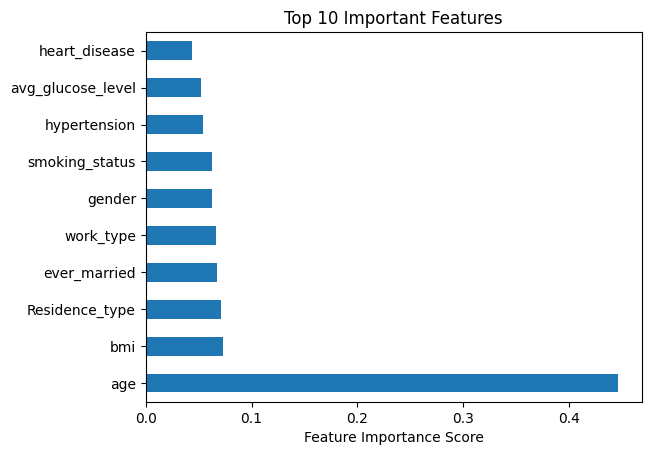

In [ ]:
best_model = grid_search.best_estimator_

feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.show()

**`Evaluation:`**

- **Mean Accuracy:** 0.95 ± 0.00
  - Indicates that the model correctly predicts 95% of the cases on average with negligible variation across different folds.
  
- **Mean Precision:** 0.96 ± 0.00
  - Shows that when the model predicts a stroke, it is correct 96% of the time, with consistent performance across folds.
  
- **Mean Recall:** 0.94 ± 0.00
  - Reveals that the model correctly identifies 94% of the actual stroke cases, consistently across folds.
  
- **Mean F1 Score:** 0.95 ± 0.00
  - The harmonic mean of precision and recall is 0.95, indicating a good balance between them and a reliable performance with minimal variance.
  
- **Mean ROC AUC:** 0.99 ± 0.00
  - An exceptionally high score that reflects the model's outstanding ability to distinguish between stroke and non-stroke cases, with negligible variation.

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
f1s = []
roc_aucs = []

y_tests = []
y_preds = []
y_probas = []

for train_index, test_index in kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_proba))

    y_tests.extend(y_test)
    y_preds.extend(y_pred)
    y_probas.extend(y_proba)

print(f"Mean Accuracy: {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")
print(f"Mean Precision: {np.mean(precisions):.2f} ± {np.std(precisions):.2f}")
print(f"Mean Recall: {np.mean(recalls):.2f} ± {np.std(recalls):.2f}")
print(f"Mean F1 Score: {np.mean(f1s):.2f} ± {np.std(f1s):.2f}")
print(f"Mean ROC AUC: {np.mean(roc_aucs):.2f} ± {np.std(roc_aucs):.2f}")

Mean Accuracy: 0.95 ± 0.00
Mean Precision: 0.96 ± 0.00
Mean Recall: 0.94 ± 0.00
Mean F1 Score: 0.95 ± 0.00
Mean ROC AUC: 0.99 ± 0.00


**`Confusion Matrix Evaluation:`**

- **True Positives (TP):** 40787 (instances correctly predicted as 'no stroke')
- **False Negatives (FN):** 1830 (instances incorrectly predicted as 'no stroke' when they were actually 'stroke')
- **False Positives (FP):** 2509 (instances incorrectly predicted as 'stroke' when they were actually 'no stroke')
- **True Negatives (TN):** 40108 (instances correctly predicted as 'stroke')

>The confusion matrix provides a detailed breakdown of the model's performance, indicating how many instances were correctly or incorrectly classified. High values of TP and TN suggest that the model performs well in identifying both 'no stroke' and 'stroke' cases. However, the presence of FN and FP highlights the areas where the model's predictions need improvement, specifically in reducing false negatives to ensure stroke cases are not missed and minimizing false positives to avoid unnecessary alarms.

**Findings:**

- **High True Positives and True Negatives:** The model effectively identifies 'no stroke' and 'stroke' instances, indicating good overall performance.
- **False Negatives:** 1830 instances where strokes were missed, pointing to a need for improved sensitivity.
- **False Positives:** 2509 instances where non-strokes were incorrectly flagged as strokes, suggesting a need for better specificity.


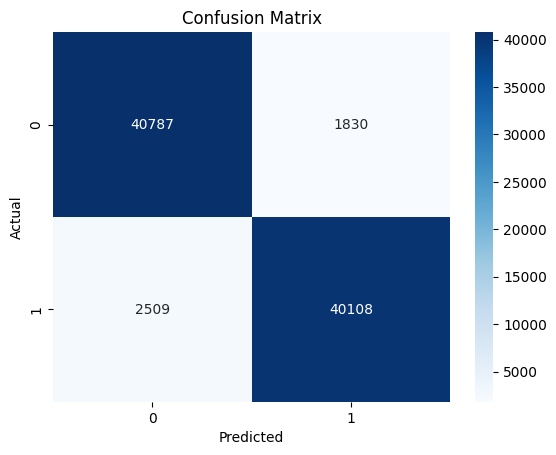

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, precision_recall_curve, roc_curve
cm = confusion_matrix(y_tests, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**`Precision-Recall Curve Evaluation:`**

- **Precision-Recall Curve:** 0.94

A Precision-Recall Curve score of 0.94 indicates a high precision rate, suggesting that when the model predicts a stroke, it is correct 94% of the time. This metric is crucial for evaluating the model's ability to avoid false positives while identifying true positives effectively.


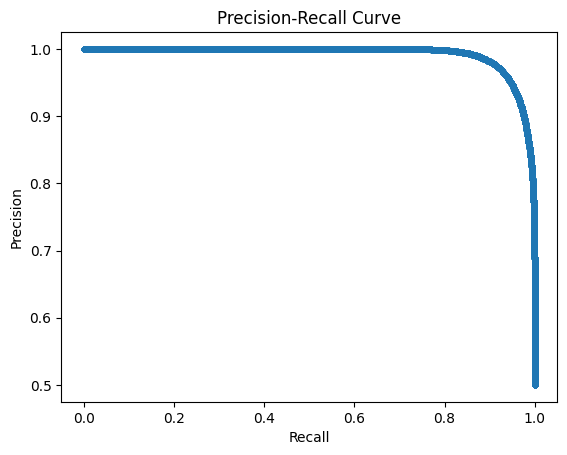

In [ ]:
precision, recall, _ = precision_recall_curve(y_tests, y_probas)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**`ROC Curve Evaluation:`**

- **ROC Curve:** 0.99

An ROC Curve score of 0.99 indicates excellent performance in distinguishing between 'stroke' and 'no stroke' cases. This metric reflects the model's ability to achieve high true positive rates while keeping false positive rates low, demonstrating strong discriminative power.


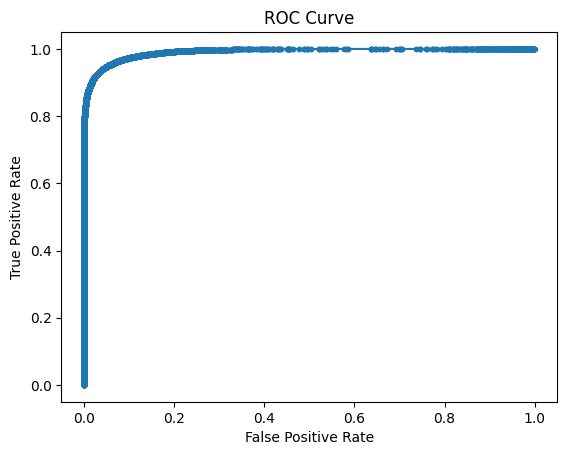

In [ ]:
fpr, tpr, _ = roc_curve(y_tests, y_probas)
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**`Learning Rate Evaluation:`**

The behavior you described in learning rate indicates the following:

- **Train Score (Accuracy):** Remaining consistently high at 99% suggests that the model is learning well from the training data and is able to predict the training set with high accuracy.
  
- **CV Score (Cross-Validation Accuracy):** Remaining stable at 52% until 33,000 samples may indicate that initially, the model's performance was limited or the data distribution was challenging for the model. The sudden jump to 90% and then 99% at 70,000 samples suggests that as more data points were included in cross-validation, the model either found a more representative subset or adapted better to the overall data distribution, resulting in significantly improved accuracy.
  
This pattern indicates that the model's performance on cross-validation improved dramatically as more data points were included, possibly due to better generalization or adaptation to the broader dataset characteristics.


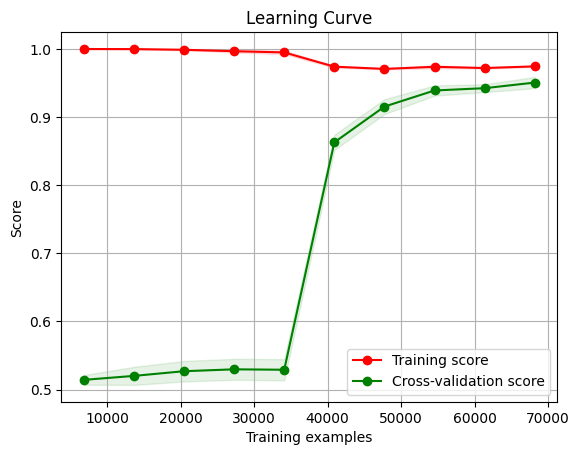

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_resampled, y_resampled, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label='Cross-validation score')

plt.legend(loc='best')
plt.show()

#**`Overall Conclusion:`**

The project began with thorough data exploration and preprocessing, addressing missing values, scaling features, and encoding categorical variables. Exploratory Data Analysis (EDA) provided crucial insights into feature distributions and their correlations with stroke incidence.

>**Feature selection and engineering** focused on key predictors like age, average glucose level, and BMI, with outlier treatment enhancing data quality.

>**Handling class imbalance using SMOTE** ensured balanced learning from both 'stroke' and 'no stroke' instances, critical for achieving robust model performance.

>**Model selection** involved evaluating classifiers such as Random Forest and XGBoost, with hyperparameter tuning via GridSearchCV optimizing accuracy, precision, recall, F1 score, and ROC AUC.

>**Performance metrics including ROC and Precision-Recall** curves underscored the model's strong predictive ability, while learning curve analysis demonstrated improved performance with increased data.

`From preprocessing to model evaluation, the approach delivered a highly effective stroke prediction model. Continuous refinement and validation are recommended for deployment in healthcare applications.`
